## MAT 653

### Dr. Wei Li

### Momentum

We assume $f(x, y)=(a-x)^2+b\left(y-x^2\right)^2$. The global minimum is $(a, a^2)$. 


The gradient of $f(x, y)$ with respect to $x$ and $y$ is $[d f / d x, d f / d y]$, which can be computed as follows:
\begin{align*}
\begin{gathered}
d f / d x=-2(a-x)-4 b x\left(y-x^2\right) \\
d f / d y=2 b\left(y-x^2\right)
\end{gathered}
\end{align*}

Let's take $a=1$ and $b=5$. 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

# Rosenbrock Function
def rosenbrock(x, y, a=1, b=5):
    return (a - x)**2 + b * (y - x**2)**2

# Gradient of Rosenbrock Function
def grad_rosenbrock(w, a=1, b=5):
    x, y = w
    dx = -2 * (a - x) - 4 * b * x * (y - x**2)
    dy = 2 * b * (y - x**2)
    return np.array([dx, dy])

# Momentum
def momentum_gradient_descent(initial_w, max_epochs=1000, alpha=0.001, gamma=0.9):
    w = np.array(initial_w)
    prev_vw = np.zeros_like(w)
    path = [w]
    for _ in range(max_epochs):
        dw = grad_rosenbrock(w)
        v_w = gamma * prev_vw + alpha * dw
        w = w - v_w
        prev_vw = v_w
        path.append(w)
    return np.array(path)

# Nesterov
def nesterov_gradient_descent(initial_w, max_epochs=1000, alpha=0.001, gamma=0.9):
    w = np.array(initial_w)
    prev_vw = np.zeros_like(w)
    path = [w]
    for _ in range(max_epochs):
        dw = grad_rosenbrock(w - gamma * prev_vw)
        v_w = gamma * prev_vw + alpha * dw
        w = w - v_w
        prev_vw = v_w
        path.append(w)
    return np.array(path)

# Adam
def adam(initial_w, max_epochs=1000, alpha=0.001, beta1=0.9, beta2=0.999, eps=1e-8):
    w = np.array(initial_w)
    v_w, s_w = np.zeros_like(w), np.zeros_like(w)
    path = [w]
    for b in range(1, max_epochs + 1):
        dw = grad_rosenbrock(w)
        v_w = beta1 * v_w + (1 - beta1) * dw
        s_w = beta2 * s_w + (1 - beta2) * dw ** 2
        v_w_hat = v_w / (1 - pow(beta1, b))
        s_w_hat = s_w / (1 - pow(beta2, b))
        w = w - (alpha / np.sqrt(s_w_hat + eps)) * v_w_hat
        path.append(w)
    return np.array(path)

Final iterate value for Momentum:  [0.99200691 0.98342997]
Final iterate value for Nesterov:  [0.99175125 0.982902  ]
Final iterate value for Adam:  [0.93268532 0.86605344]


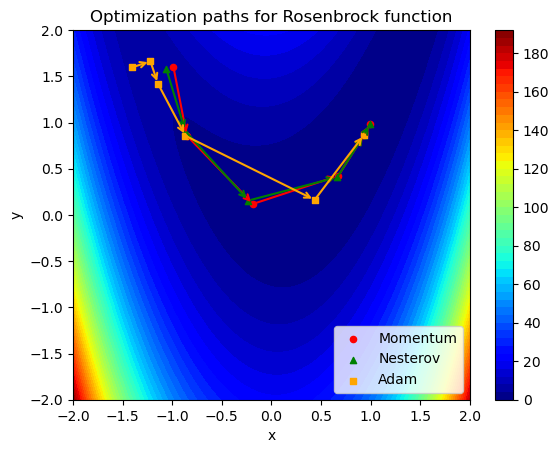

In [28]:
# Plot function
def plot_specific_iterations(path, iterations, marker, color, label=None):
    for i in range(len(iterations)):
        idx = iterations[i]
        if idx < len(path):
            plt.scatter(path[idx, 0], path[idx, 1], marker=marker, color=color, s=20)
            if i > 0:
                prev_idx = iterations[i - 1]
                plt.annotate("", xy=(path[idx, 0], path[idx, 1]), xytext=(path[prev_idx, 0], path[prev_idx, 1]),
                             arrowprops=dict(arrowstyle="->", lw=1.5, color=color))

# Create contour plot
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock(X, Y)
plt.contourf(X, Y, Z, levels=50, cmap='jet')
plt.colorbar()

# Initial weights
initial_w = np.array([-1.5, 1.5])
path_momentum = momentum_gradient_descent(initial_w)
path_nesterov = nesterov_gradient_descent(initial_w)
path_adam = adam(initial_w, alpha=0.01)

# Print the last iterate values for each optimization method
print("Final iterate value for Momentum: ", path_momentum[-1])
print("Final iterate value for Nesterov: ", path_nesterov[-1])
print("Final iterate value for Adam: ", path_adam[-1])

# Specified iterations
specified_iterations = [10, 50, 100, 200, 500, 1000]

# Plot specified iterations
plot_specific_iterations(path_momentum, specified_iterations, 'o', 'red')
plot_specific_iterations(path_nesterov, specified_iterations, '^', 'green')
plot_specific_iterations(path_adam, specified_iterations, 's', 'orange')

# Add legend
plt.scatter([], [], marker='o', color='red', s=20, label='Momentum')
plt.scatter([], [], marker='^', color='green', s=20, label='Nesterov')
plt.scatter([], [], marker='s', color='orange', s=20, label='Adam')

# Labels and legends
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.title('Optimization paths for Rosenbrock function')
plt.show()